In [19]:
import pandas as pd
data = pd.read_csv("motion_data_modified_2.csv")

In [21]:
data["category"].unique()

array(['dws', 'jog', 'sit', 'std', 'ups'], dtype=object)

In [23]:
data.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x',
       'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y',
       'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y',
       'userAcceleration.z', 'subject_id', 'category'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["category"] = label_encoder.fit_transform(data["category"])

In [27]:
class_to_encoded = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
class_to_encoded

{'dws': 0, 'jog': 1, 'sit': 2, 'std': 3, 'ups': 4}

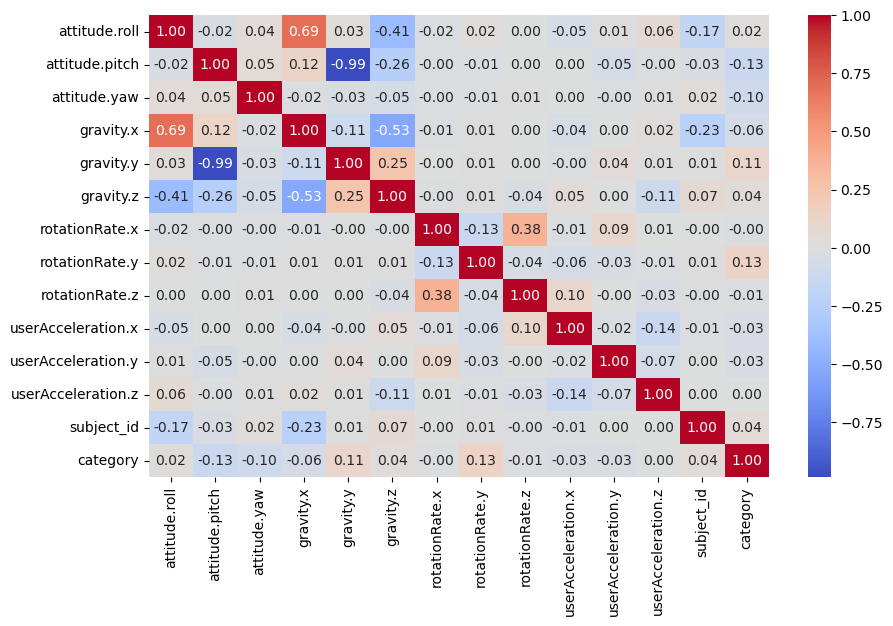

Correlation of dependent variable with other features:
 category              1.000000
rotationRate.y        0.133039
gravity.y             0.105552
subject_id            0.043461
gravity.z             0.037645
attitude.roll         0.016356
userAcceleration.z    0.001716
rotationRate.x       -0.001621
rotationRate.z       -0.014267
userAcceleration.y   -0.028876
userAcceleration.x   -0.032471
gravity.x            -0.058064
attitude.yaw         -0.096207
attitude.pitch       -0.129416
Name: category, dtype: float64


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_encoded' is your DataFrame with numeric variables
# Make sure 'target' is your dependent variable (the one you're trying to predict)

# Compute the correlation matrix
cor = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# To get the correlation of the dependent variable ('target') with other features
target_corr = cor['category'].sort_values(ascending=False)
print("Correlation of dependent variable with other features:\n", target_corr)


In [31]:
data_new = data[["category","rotationRate.y","gravity.y","attitude.pitch"]]

In [33]:
data_new

,category,rotationRate.y,gravity.y,attitude.pitch
0,0,0.778180,0.669768,-0.733896
1,0,0.424446,0.657116,-0.716987
2,0,-0.040741,0.649555,-0.706999
3,0,-1.048717,0.647788,-0.704678
4,0,-0.912890,0.647210,-0.703918
...,...,...,...,...
1048570,4,0.410641,0.056991,-0.057022
1048571,4,0.343984,0.079080,-0.079162
1048572,4,-0.082331,0.128619,-0.128976
1048573,4,0.383404,0.189535,-0.190689


In [31]:
data_new.to_csv("sensor_data_post_feature_selection.csv")

In [39]:
#### performing training ###

In [35]:
data_new.columns

Index(['category', 'rotationRate.y', 'gravity.y', 'attitude.pitch'], dtype='object')

In [37]:
X = data_new.drop(["category"], axis=1)  # Features (independent variables)
y = data_new["category"]  # Target variable (dependent variable)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [43]:
import logging
logging.basicConfig(level=logging.INFO)
model.fit(X_train, y_train)

C:\Users\Gopal Bhavsar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [55]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [57]:
accuracy

0.7578094080061035

In [79]:
model.save_model('xgboost_model_v2.1.json')

ratation_angle = -0.004155
gyroy = 0.064722
pitch = -0.064767

In [81]:
data_dict = {
    "rotationRate.y": [ratation_angle],
    "gravity.y": [gyroy],
    "attitude.pitch": [pitch],
}
df_test = pd.DataFrame(data_dict)

loaded_model = xgb.XGBClassifier()  # Or use XGBRegressor depending on your task
loaded_model.load_model('xgboost_model_v2.1.json')

In [83]:
y_pred1 = loaded_model.predict(df_test)

In [85]:
predicted_class_names = label_encoder.inverse_transform(y_pred1)

In [87]:
predicted_class_names

array(['sit'], dtype=object)

In [3]:
import sklearn
print(sklearn.__version__)

1.5.1


In [5]:
action_dict = {'going down hill': 0, 'running': 1, 'siting': 2, 'standing': 3, 'clibing': 4}


KeyError: 0